In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.table import Table

In [13]:

file_path = 'MIST_iso_8.iso'
sim = Table.read(file_path, format='ascii', header_start=-1)


print(sim['initial_mass'])

# Filter values between 0.1 and 5
filtered_data = sim[(sim['initial_mass'] >= 0.1) & (sim['initial_mass'] <= 5.5)]


# Print the filtered data
print("Filtered data:")
print(filtered_data['initial_mass'])

    initial_mass   
-------------------
                0.1
0.10197952385042827
0.10596699068424126
 0.1100364332624221
 0.1141504754487366
0.11827592781020953
0.12243062868095764
0.12661820617425137
0.13083283160322598
0.13507119026117276
                ...
  5.402703810608584
  5.404089801432141
  5.405565058612343
  5.407144324040107
  5.408819644448249
  5.410626120560565
  5.412557868806051
 5.4146369790483275
  5.416887462959697
  5.419317309199338
  5.421951840849083
Length = 1563 rows
Filtered data:
    initial_mass   
-------------------
                0.1
0.10197952385042827
0.10596699068424126
 0.1100364332624221
 0.1141504754487366
0.11827592781020953
0.12243062868095764
0.12661820617425137
0.13083283160322598
0.13507119026117276
                ...
  5.402703810608584
  5.404089801432141
  5.405565058612343
  5.407144324040107
  5.408819644448249
  5.410626120560565
  5.412557868806051
 5.4146369790483275
  5.416887462959697
  5.419317309199338
  5.421951840849083
Length

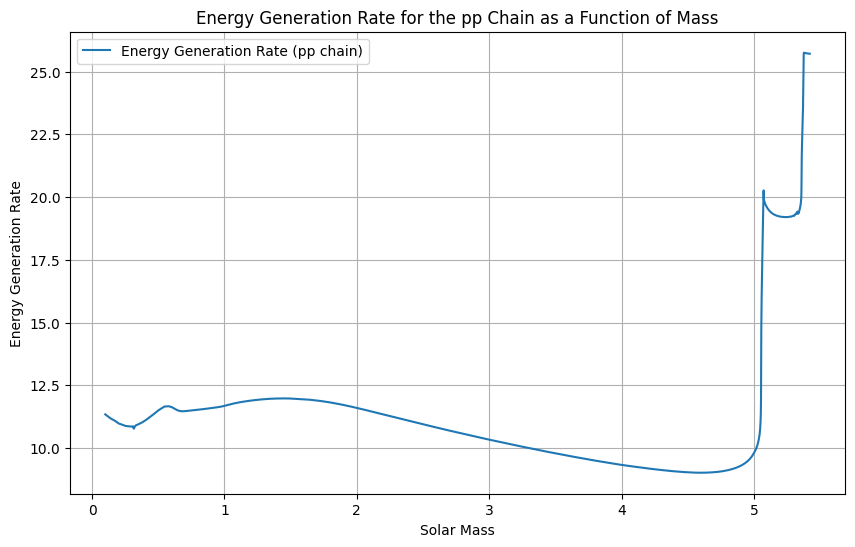

In [14]:
mass = filtered_data['initial_mass']
density = filtered_data['log_center_Rho'] ** 10
temperature = filtered_data['log_center_T'] ** 10

#molecular make up
x = 0.7
Z = 0.02

# Constants
constant_factor = 5e5

# Calculate the normalized temperature
T_7 = temperature / 1e7

# Calculate the energy generation rate for the pp chain
energy_generation_rate = constant_factor * density * x**2 * T_7**(-2/3) * np.exp(-15.7 / T_7**(1/3))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mass, np.log(energy_generation_rate), label='Energy Generation Rate (pp chain)')
plt.title('Energy Generation Rate for the pp Chain as a Function of Mass')
plt.xlabel('Solar Mass')
plt.ylabel('Energy Generation Rate')
plt.legend()
plt.grid(True)
plt.show()